<a href="https://colab.research.google.com/github/alexandergribenchenko/Adivino_tu_mano/blob/main/Adivino_tu_mano_(Notebook_Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Conexión al repositorio donde tenemos nuestras imagenes

In [1]:
# Generamos una conexión a nuestra carpeta de Drive que nos permita tener acceso 
# a los carpetas donde tenemos nuestras imagenes de entrenamiento, validación y test

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Librerías necesarias para el desarrollo del proyecto

In [2]:
# Importamos las librerías necesarias para el proyecto

# Librerías necesarias para el procesamiento numérico y de graficación
import numpy as np
import matplotlib.pyplot as plt

# Librerías necesarias para implementar el modelo basado en redes neuronales
import tensorflow as tf
from tensorflow import keras

# Librería necesaria para importar y procesar imagenes
import imageio

# Librería necesaria para obtener los nombres y paths de todas nuestras imagenes
import os 

# 3. Ejemplo de como se importa y preprocesa una única imagen

<class 'imageio.core.util.Array'>
<class 'numpy.ndarray'>
(64, 64, 3)


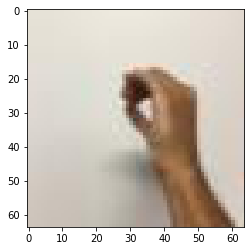

In [3]:
# Ejemplo de como podemos importar y visualizar una de las imagenes de nuestro set de entrenamiento

# Importamos la imagen:
image = imageio.imread('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5942.jpg')

# Visualizamos el tipo de objeto que es:
print(type(image))

# Hacemos una conversión a tipo array de numpy:
image_np = np.asarray(image)
print(type(image_np))

# Visualizamos las dimensiones del nuevo arreglo:
print(image_np.shape)

# Visualizamos las imagen importada:
plt.imshow(image_np)

(64, 64)


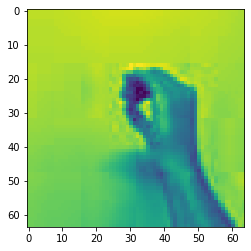

In [4]:
# Dado que resultara más liviano y útil para la red neuronal, la clasificación la 
# haremos unicamante empleando el primer canal del RGB de la imagen

# Chequeamos la nueva dimensión del array 
print(image_np[:,:,0].shape)

# Visualizamos las imagen tras la trasformación:
plt.imshow(image_np[:,:,0])

# 4. Obtención de la totalidad de los paths y nombres de nuestras imagenes

In [5]:
# Definimos una función que nos permita obtener una lista con todos los paths o
# nombres de las imagenes con las que deseamos trabajar
# Entradas
# - dir: ruta del directorio del que deseamos obtener las imagenes
# - tipo: nos permite obtener o bien obtener los nombre o el paths de todas las imagenes
#         (las entrasas posibles son respectivamante: 'paths' o 'names )
# Salida
# - salida: lista con los nombres o los paths de todas las imagenees en la carpeta dir
def list_dir(dir, tipo):
    file_names = os.listdir(dir)
    if tipo=='names':
       salida = [file_name for file_name in file_names]
    elif tipo=='paths': 
      salida = [os.path.abspath(os.path.join(dir,file_name)) for file_name in file_names]
    return salida

##### **---> Lista de paths y nombres del conjunto train**

In [6]:
# Empleamos nuestra función para obtener las listas con los nombres y los path del conjunto de train
list_names_train_signs = list_dir('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs', 'names')
list_paths_train_signs = list_dir('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs', 'paths')

# Visualicemos la cantidad total de imagenes de nuestro conjunto de train
print(len(list_paths_train_signs))

# Visualicemos a manera de ejemplo los primeros 5 elementos de los nombres
print(list_names_train_signs[:5])

# Visualicemos a manera de ejemplo los primeros 5 elementos de los paths
list_paths_train_signs[:5]

864
['2_IMG_4702.jpg', '1_IMG_4391.jpg', '1_IMG_4561.jpg', '1_IMG_4448.jpg', '0_IMG_5932.jpg']


['/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/2_IMG_4702.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/1_IMG_4391.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/1_IMG_4561.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/1_IMG_4448.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/train_signs/0_IMG_5932.jpg']

##### **---> Lista de paths y nombres del conjunto de test**

In [7]:
# Empleamos nuestra función para obtener las listas con los nombres y los path del conjunto de test
list_names_test_signs = list_dir('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs', 'names')
list_paths_test_signs = list_dir('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs', 'paths')

# Visualicemos la cantidad total de imagenes de nuestro conjunto de test
print(len(list_paths_test_signs))

# Visualicemos a manera de ejemplo los primeros 5 elementos de los nombres
print(list_names_test_signs[:5])

# Visualicemos a manera de ejemplo los primeros 5 elementos de los paths
list_paths_test_signs[:5]

120
['4_IMG_5425.jpg', '0_IMG_5969.jpg', '3_IMG_6110.jpg', '5_IMG_5621.jpg', '1_IMG_4523.jpg']


['/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/4_IMG_5425.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5969.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/3_IMG_6110.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/5_IMG_5621.jpg',
 '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/1_IMG_4523.jpg']

# 5. Obtención de los arrays con los labels para el entrenamiento y evaluación

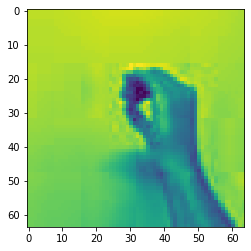

In [8]:
# Observamos que los nombres de las imagenes contienen siempre como primer elemento
# el label de la imagen (el numero 'verdadero' al que se asocia la imagen que se pretendio representar con la mano)

# A manera de ejemplo vemos que la imagen que lleva por nombre 0_IMG_5942.jpg, trato de representar el número 0
image_np_r = np.asarray(imageio.imread('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5942.jpg'))[:,:,0]

# Visualizamos las imagen importada:
plt.imshow(image_np_r)

##### **---> Array con los labels del conjunto de train**

In [9]:
# Empleando el primer digito del nombre y a partir de un list comprenhention 
# obtenemnos la totalidad de los labels para el conjunto de train
# (Este arreglo ya tiene las dimensiones necesarias para ser empleado como label en keras)
train_labels = np.asarray([int(name[0]) for name  in list_names_train_signs])

# Imprimimos para corroborar el tamaño del arreglo para el conjunto de train
print(train_labels.shape)

# Visualizamos a manera de ejemplo los 20 primeros registros
train_labels[:20]

(864,)


array([2, 1, 1, 1, 0, 3, 2, 2, 4, 3, 1, 1, 5, 4, 4, 1, 5, 1, 2, 3])

##### **---> Array con los labels del conjunto de test**

In [10]:
# Empleando el primer digito del nombre y a partir de un list comprenhention 
# obtenemnos la totalidad de los labels para el conjunto de test
# (Este arreglo ya tiene las dimensiones necesarias para ser empleado como label en keras)
test_labels = np.asarray([int(name[0]) for name  in list_names_test_signs])

# Imprimimos para corroborar el tamaño del arreglo para el conjunto de test
print(test_labels.shape)

# Visualizamos a manera de ejemplo los 20 primeros registros
test_labels[:20]

(120,)


array([4, 0, 3, 5, 1, 4, 2, 1, 1, 2, 4, 0, 0, 0, 3, 4, 5, 2, 4, 0])

# 6. Obtención de los arrays de las imagenes de entrenamiento y evaluación

##### **---> Array con las imagenes del conjunto de train**

In [11]:
# Empleando el mismo procedimiento del numeral 3 para una única imagen, y haciendo uno de 
# una list comprenhention obtenemos una array con la información de todas las imagenes del conjunto de train
train_images = np.array([ np.asarray(imageio.imread(path))[:,:,0] for path in list_paths_train_signs])

# Visualizamos inicialmente la forma de dicha matriz (tal como esta no es aceptada por keras)
print(train_images.shape)

# Generamos un reshape de tal manera que pueda tener la forma que es aceptada por keras
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
print(train_images.shape)

# Finalmente convertimos la escala de 0 a 255, a una escala normalizada entre 0 y 1 con valores flotantes
# (Es una recomendación recurrente al trabajar con imagenes y redes neuronales para su clasificación)
train_images = train_images.astype('float32')/255

(864, 64, 64)
(864, 64, 64, 1)


##### **---> Array con los labels del conjunto de test**

In [12]:
# Empleando el mismo procedimiento del numeral 3 para una única imagen, y haciendo uno de 
# una list comprenhention obtenemos una array con la información de todas las imagenes del conjunto de test
test_images = np.array([ np.asarray(imageio.imread(path))[:,:,0] for path in list_paths_test_signs])

# Visualizamos inicialmente la forma de dicha matriz (tal como esta no es aceptada por keras)
print(test_images.shape)

# Generamos un reshape de tal manera que pueda tener la forma que es aceptada por keras
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
print(test_images.shape)

# Finalmente convertimos la escala de 0 a 255, a una escala normalizada entre 0 y 1 con valores flotantes
# (Es una recomendación recurrente al trabajar con imagenes y redes neuronales para su clasificación)
test_images = test_images.astype('float32')/255

(120, 64, 64)
(120, 64, 64, 1)


## Vamos por aquí

# 7. Modelo básico de clasificación de redes neuronales

In [13]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=100, batch_size=32)

Epoch 1/100
27/27 [==============================] - 2s 2ms/step - loss: 4.3611 - accuracy: 0.1598
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 1.8991 - accuracy: 0.1801
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 1.8693 - accuracy: 0.2074
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 1.7926 - accuracy: 0.2095
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 1.7313 - accuracy: 0.2425
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 1.7070 - accuracy: 0.2597
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 1.6407 - accuracy: 0.3297
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 1.5691 - accuracy: 0.3565
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 1.4867 - accuracy: 0.3886
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 1.4813 - accuracy: 0.4119
Epoch 11/

In [14]:
model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.7833


[0.6173897981643677, 0.7833333611488342]

# 10. Guardado del modelo y evaluación para una imagen específica

In [15]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/Colab Notebooks/modelo_01.hdf5')

In [16]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/modelo_01.hdf5')

In [17]:
loaded_model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.7833


[0.6173897981643677, 0.7833333611488342]

In [18]:
loaded_model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.7833


[0.6173897981643677, 0.7833333611488342]

# 11. Prediciendo para un único ejemplo

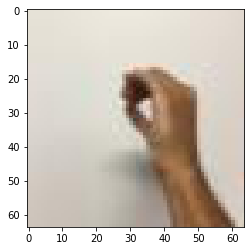

In [52]:
image = np.asarray(imageio.imread('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5942.jpg'))
plt.imshow(image)

In [53]:
def import_and_predict(image, model): 
        image_paso_01 = image[:,:,0]
        image_paso_02 = np.array([image_paso_01])
        image_paso_03= image_paso_02.reshape(image_paso_02.shape[0], image_paso_02.shape[1], image_paso_02.shape[2], 1)
        image_paso_04 = image_paso_03.astype('float32')/255
        prediction = model.predict(image_paso_04)
        return prediction

In [56]:
prediction=import_and_predict(image, loaded_model)
print(prediction)
print(np.argmax(prediction))

[[1.8783365e-01 2.3230580e-04 1.3663075e-02 7.2535652e-01 6.2171880e-02
  1.0742542e-02]]
3


## Train a Network (convolutional approach)

In [45]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(64,64,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=8, batch_size=32)

Epoch 1/8
27/27 [==============================] - 1s 10ms/step - loss: 2.6278 - accuracy: 0.1791
Epoch 2/8
27/27 [==============================] - 0s 9ms/step - loss: 1.7524 - accuracy: 0.3953
Epoch 3/8
27/27 [==============================] - 0s 8ms/step - loss: 1.6014 - accuracy: 0.5284
Epoch 4/8
27/27 [==============================] - 0s 8ms/step - loss: 1.2931 - accuracy: 0.6106
Epoch 5/8
27/27 [==============================] - 0s 8ms/step - loss: 1.0443 - accuracy: 0.6645
Epoch 6/8
27/27 [==============================] - 0s 8ms/step - loss: 0.9115 - accuracy: 0.6901
Epoch 7/8
27/27 [==============================] - 0s 8ms/step - loss: 0.7557 - accuracy: 0.7377
Epoch 8/8
27/27 [==============================] - 0s 8ms/step - loss: 0.6120 - accuracy: 0.8076


In [46]:
model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 0.7987 - accuracy: 0.7333


[0.7987474203109741, 0.7333333492279053]

## A Better Convolutional Network

In [ ]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(64,64,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=50, batch_size=32)

Epoch 1/50
27/27 [==============================] - 0s 3ms/step - loss: 1.8119 - accuracy: 0.1666
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 1.7908 - accuracy: 0.1960
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 1.7830 - accuracy: 0.2887
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 1.7486 - accuracy: 0.2945
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 1.6260 - accuracy: 0.3753
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 1.4895 - accuracy: 0.4223
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 1.3699 - accuracy: 0.4863
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 1.2749 - accuracy: 0.4975
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 1.2328 - accuracy: 0.5240
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 1.2211 - accuracy: 0.5652
Epoch 11/50
27/27 [

In [ ]:
model.evaluate(test_images,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.8667


[0.42015400528907776, 0.8666666746139526]

## Hyperparameter Tuning

In [ ]:
pip install -U keras-tuner

Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.6/dist-packages (1.0.2)


In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(64,64,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(6, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.6216 - accuracy: 0.8331


[0.6081161499023438, 0.824999988079071]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 18, 18, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
Conv Layers: 3
Dense layer: 512
layer_0_filters: 32
layer_1_filters: 32
layer_2_filters: 16
Score: 0.8279569745063782
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 32
layer_1_filters: 16
layer_2_filters: 16
Score: 0.8145161271095276
Trial summary
Hyperparameters:
Conv Layers: 3
Dense layer: 1024
layer_0_filters: 16
layer_1_filters: 64
layer_2_filters: 16
Score: 0.7956989407539368
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 128
layer_0_filters: 32
layer_1_filters: 64
layer_2_filters: 64
Score: 0.774193525314331
Trial summary
Hyperparameters:
Conv Layers: 3
Dense layer: 512
layer_0_filters: 16
layer_1_filters: 32
layer_2_filters: 64
Score: 0.7715053558349609
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 128
layer_0_filters: 16
layer_1_filters: 64
layer_2_filters: 16
Score: 0.7715053

# Miscellaneous Useful Techniques
## Save & Load our Models


In [ ]:
model.save('./my_modelo_burro')

INFO:tensorflow:Assets written to: ./my_modelo_burro/assets


In [ ]:
best_model.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model/assets


In [ ]:
loaded_model = keras.models.load_model('./my_model')

OSError: ignored

In [ ]:
loaded_model.evaluate(test_images, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.6081 - accuracy: 0.8250


[0.6081161499023438, 0.824999988079071]

In [ ]:
tf.keras.models.save_model(model,'my_modelo_burroo.hdf5')

## Plot Image from Numpy Array

## Use Model to Predict Result for Single Example

In [ ]:
train_images[151].shape

(64, 64, 1)

In [ ]:
result = best_model.predict(np.array([train_images[151]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

NameError: ignored

In [ ]:

result = model.predict(np.array([np.asarray(imageio.imread('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5942.jpg'))[:,:,0]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

[[1. 0. 0. 0. 0. 0.]]
0


In [ ]:
result = model.predict(np.array([train_images[151]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

[[6.3477160e-04 9.8693895e-01 7.1239169e-03 1.7850508e-04 4.5462744e-03
  5.7757046e-04]]
1


In [ ]:
result = model.predict(np.array(train_images[[151]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

[[6.3477160e-04 9.8693895e-01 7.1239169e-03 1.7850508e-04 4.5462744e-03
  5.7757046e-04]]
1


In [ ]:
result[0][0]

0.0006347716

In [ ]:
np.array([train_images[151]]).shape

(1, 64, 64, 1)

In [ ]:
np.array([np.asarray(imageio.imread('/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5942.jpg'))[:,:,0]]).shape

(1, 64, 64)

In [ ]:
train_images[151]

array([[223, 226, 228, ..., 229, 229, 229],
       [223, 226, 227, ..., 229, 229, 229],
       [223, 225, 227, ..., 229, 229, 229],
       ...,
       [206, 204, 203, ..., 206, 207, 207],
       [204, 204, 202, ..., 205, 206, 206],
       [203, 203, 201, ..., 205, 206, 206]], dtype=uint8)

In [ ]:
[train_images[151]]

[array([[223, 226, 228, ..., 229, 229, 229],
        [223, 226, 227, ..., 229, 229, 229],
        [223, 225, 227, ..., 229, 229, 229],
        ...,
        [206, 204, 203, ..., 206, 207, 207],
        [204, 204, 202, ..., 205, 206, 206],
        [203, 203, 201, ..., 205, 206, 206]], dtype=uint8)]

In [ ]:
np.array([train_images[151]])

array([[[223, 226, 228, ..., 229, 229, 229],
        [223, 226, 227, ..., 229, 229, 229],
        [223, 225, 227, ..., 229, 229, 229],
        ...,
        [206, 204, 203, ..., 206, 207, 207],
        [204, 204, 202, ..., 205, 206, 206],
        [203, 203, 201, ..., 205, 206, 206]]], dtype=uint8)

In [ ]:
np.array([train_images[151]])[0]

array([[223, 226, 228, ..., 229, 229, 229],
       [223, 226, 227, ..., 229, 229, 229],
       [223, 225, 227, ..., 229, 229, 229],
       ...,
       [206, 204, 203, ..., 206, 207, 207],
       [204, 204, 202, ..., 205, 206, 206],
       [203, 203, 201, ..., 205, 206, 206]], dtype=uint8)

In [ ]:
np.array([train_images[151]])[0][0]

array([223, 226, 228, 232, 234, 233, 232, 229, 227, 223, 220, 221, 222,
       226, 229, 230, 230, 229, 226, 224, 223, 224, 226, 231, 236, 239,
       241, 240, 238, 235, 232, 229, 232, 232, 232, 232, 232, 232, 232,
       232, 230, 230, 230, 231, 231, 232, 232, 232, 232, 232, 232, 232,
       232, 232, 232, 232, 231, 231, 231, 230, 230, 229, 229, 229],
      dtype=uint8)

In [ ]:
type(result)

numpy.ndarray

In [ ]:
np.array([1,2,3])

array([1, 2, 3])

In [ ]:
type(np.array([1,2,3]))

numpy.ndarray

In [ ]:
print(np.array([0,1,2,3,4,5,6]))

[1 2 3]


In [ ]:
np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [ ]:
visual = np.array([ np.asarray(imageio.imread(path))[:,:,0] for path in list_paths_train_signs])

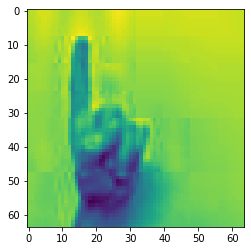

In [ ]:
plt.imshow(visual[151])

In [ ]:
file = '/content/drive/MyDrive/Colab Notebooks/64x64_SIGNS/test_signs/0_IMG_5942.jpg'

In [ ]:
image = np.asarray(imageio.imread(file))

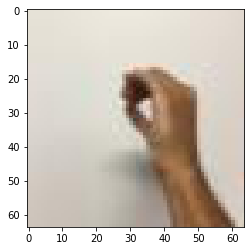

In [ ]:
plt.imshow(image)

In [ ]:
def import_and_predict(imagenn, model):
    
        #size = (64,64)    
        t_image = np.array([imagenn[0,:,:]])
        j_image = t_image.reshape(t_image.shape[0], t_image.shape[1], t_image.shape[2], 1)
        #image = np.asarray(image)
        #image = (image.astype(np.float32) / 255.0)

        #img_reshape = image#[np.newaxis,...]

        prediction = model.predict(j_image)
        #prediction=np.array([0.8, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
        return prediction [0]

In [ ]:
import_and_predict(image, model)

InvalidArgumentError: ignored

In [ ]:
model